# 코카콜라 주가 예측(Coca Cola stock analysis)

## 문제 상황  

리서치센터 A는 주가의 상승, 하락에 대한 연구를 진행하고 있다. 시가, 고가, 저가, 종가 등 주가에 관련된 데이터와 거래량, 배당일,  
주식분할일 같은 추가 정보를 활용하여 주가 상승, 하락에 대해서 예측해보고자 한다.

## 문제 해결 프로세스  

1. 문제정의

- 주가 상승, 하락에 대한 영향 요인 불분명 

2. 기대효과

- 주가 상승, 하락에 대한 영향 요인 규명 

3. 해결방안

- 주가 데이터 활용 모델링을 통한 상승, 하락 예측 및 영향 요인 탐색 

4. 성과측정

- 추후 주가 예측에 대한 적중률

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/USER/Desktop/Practice Project/코라콜라 주가 예측/코라콜라 주가 예측.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0
3,1962-01-05,0.050374,0.051006,0.049108,0.049234,1420800,0.0,0.0
4,1962-01-08,0.048855,0.048855,0.047779,0.048728,2035200,0.0,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15122 entries, 0 to 15121
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15122 non-null  object 
 1   Open          15122 non-null  float64
 2   High          15122 non-null  float64
 3   Low           15122 non-null  float64
 4   Close         15122 non-null  float64
 5   Volume        15122 non-null  int64  
 6   Dividends     15122 non-null  float64
 7   Stock Splits  15122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 945.2+ KB


In [3]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

#### 변수 해석 3가지  

1. 결측치 존재 여부

- 전체 데이터에서 결측치가 존재하지 않는다.

- 만약, 결측치가 존재했다면 전체 데이터의 약 5%정도 미만의 개수는 제거해도 좋다.

- 결측치를 대체하는 경우, object형태는 최빈값으로 대체하고, int64 or float64형태는 평균으로 대체하거나 KNN을 사용할 수 있다.

2. 데이터 타입 설명

- object형태 1개, int64형태 1개, float64형태 6개로 총 8개의 변수가 존재한다.

- Date 변수가 object형태이므로 datetime64형태로 변환해줄 필요가 있어보인다.

3. 컬럼 설명

- Date : 날짜
- Open : 시가
- High : 고가
- Low : 저가
- Close : 종가
- Volume : 거래량
- Dividends : 배당일
- Stock Splits : 분할일

In [4]:
import datetime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15122 entries, 0 to 15121
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          15122 non-null  datetime64[ns]
 1   Open          15122 non-null  float64       
 2   High          15122 non-null  float64       
 3   Low           15122 non-null  float64       
 4   Close         15122 non-null  float64       
 5   Volume        15122 non-null  int64         
 6   Dividends     15122 non-null  float64       
 7   Stock Splits  15122 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 945.2 KB


Date 변수를 시간 데이터 형태로 변환해준다

주가 예측 데이터는 이상치 탐색을 따로 하지 않는다. 현상을 그대로 반영한 데이터이고 상한가, 하한가의 한계가 없기 때문에 하루에 몇배가 뛰어도 이상하지 않다. 모든 데이터를 사용해서 예측해야한다. 해당 데이터의 변수 외에도 외부적인 요인(물가, 환율, 금리 등)에 의해서도 변동하니 다양한 데이터가 많을수록 좋다

### 주가 트렌드 확인

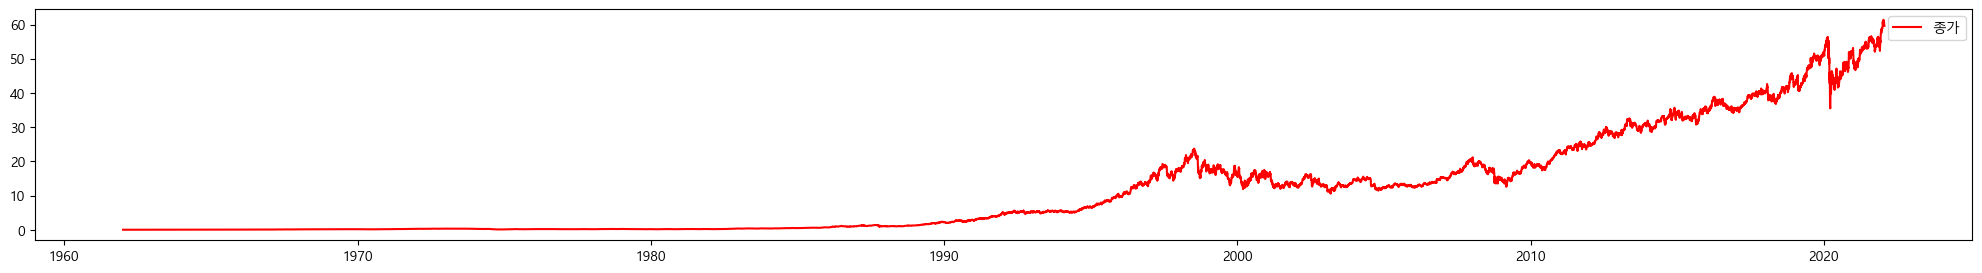

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.plot(df['Date'], df['Close'], label='종가', color='r');
plt.legend()
plt.gcf().set_size_inches(25, 3)

종가를 기준으로 확인한 결과, 우상향 그래프임을 알 수 있다

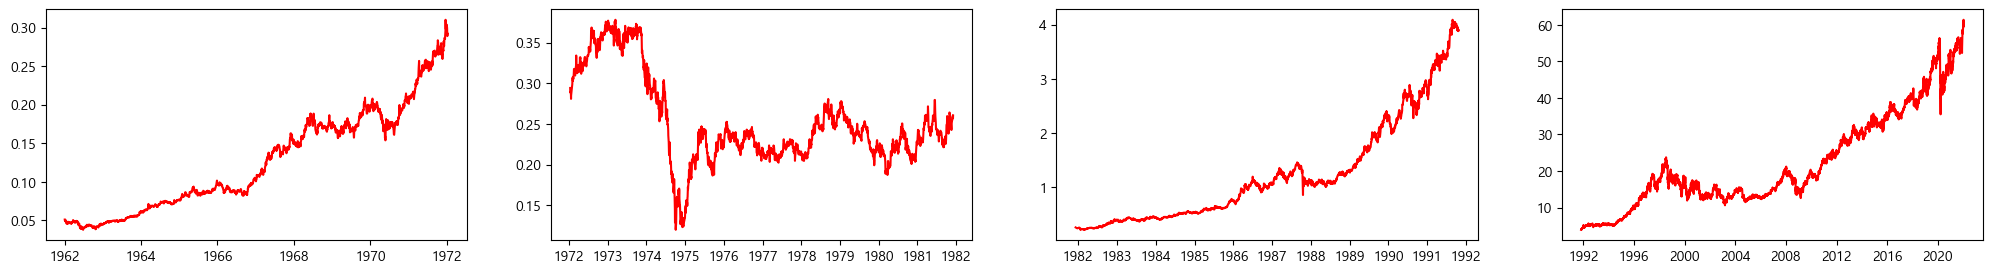

In [8]:
plt.subplot(1,4,1)
plt.plot(df['Date'][0:2500], df['Close'][0:2500], label='종가', color='r');

plt.subplot(1,4,2)
plt.plot(df['Date'][2501:5000], df['Close'][2501:5000], label='종가', color='r');

plt.subplot(1,4,3)
plt.plot(df['Date'][5001:7500], df['Close'][5001:7500], label='종가', color='r');

plt.subplot(1,4,4)
plt.plot(df['Date'][7501:], df['Close'][7501:], label='종가', color='r');
plt.gcf().set_size_inches(25, 3)

코카콜라가 상장하고 난 뒤, 모든 기간동안 우상향하는지를 확인하기 위해 기간별로 구분해서 상세 주가를 확인한 결과, 1972년부터 약 10년동안은 하락 추세를 나타내고 있음을 알 수 있다

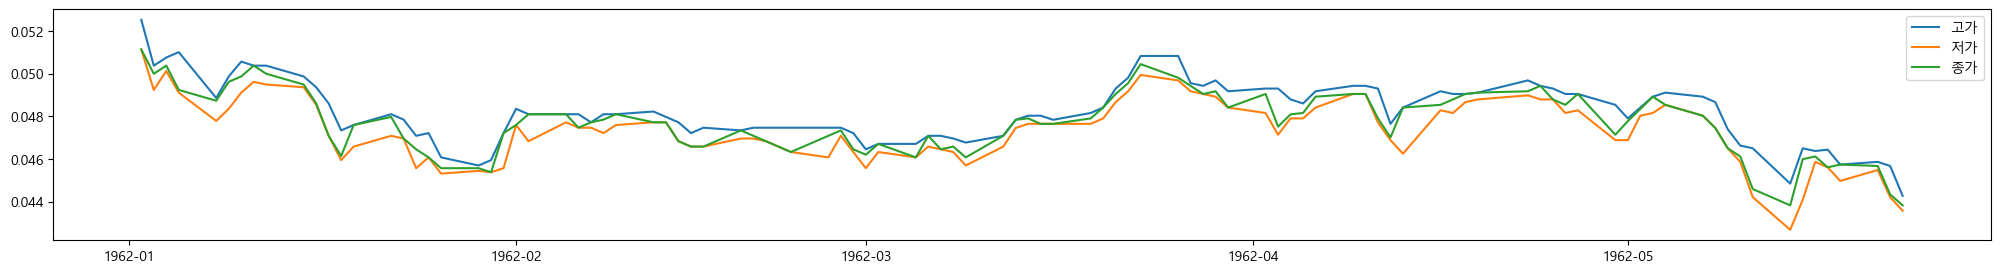

In [10]:
plt.plot(df['Date'][0:100], df[['High', 'Low', 'Close']][0:100]);
plt.legend(['고가', '저가', '종가'])
plt.gcf().set_size_inches(25, 3)

고가, 저가, 종가를 기준으로 가격 추이를 확인할 수 있다

In [13]:
!pip install --upgrade mplfinance

     ---------------------------------------- 73.1/73.1 kB 4.2 MB/s eta 0:00:00


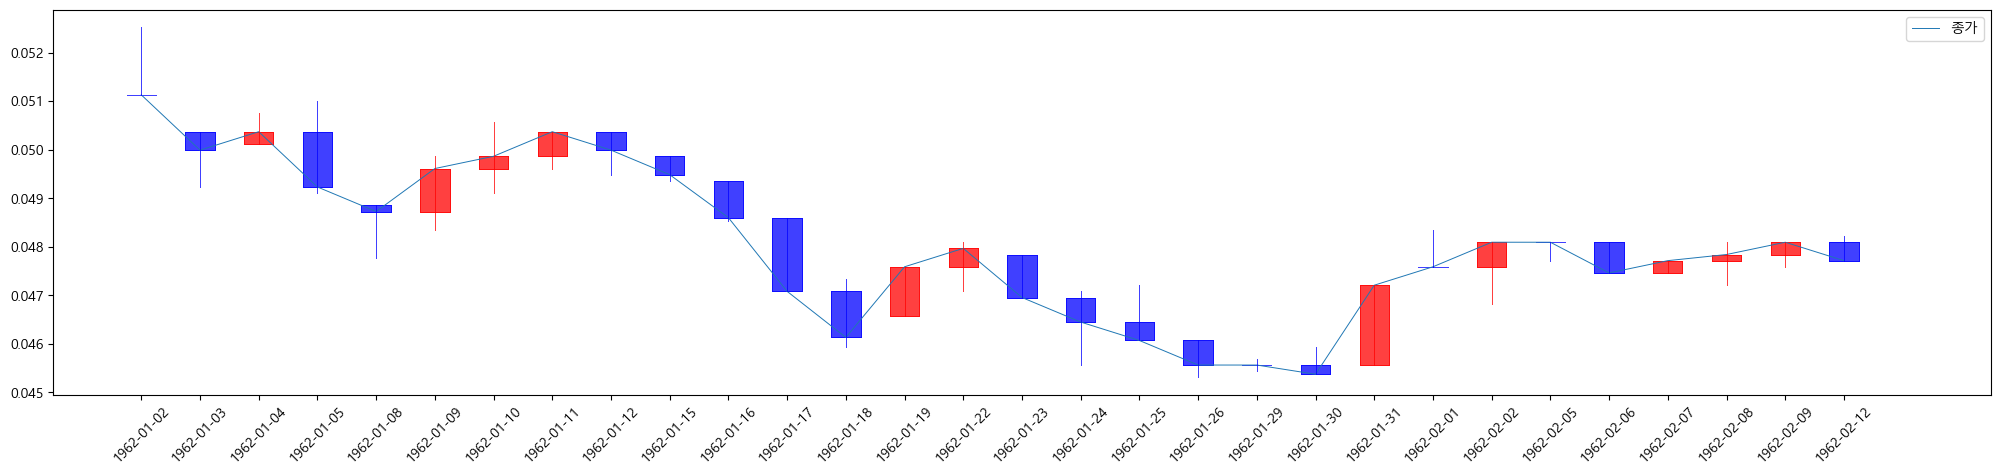

In [15]:
from mpl_finance import candlestick2_ohlc

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

df_100 = df.iloc[0:30,:]
df_100 =df_100.set_index('Date')
index = df_100.index.astype('str')

ax.plot(index, df_100['Close'], label='종가', linewidth=0.7)

candlestick2_ohlc(ax, df_100['Open'], df_100['High'], 
                  df_100['Low'], df_100['Close'],
                  width=0.5, colorup='r', colordown='b');
plt.xticks(rotation=45)
ax.legend()

캔들스틱으로 주가 그래프를 확인해 볼 수 있다

## 주가 이슈 확인

주가이슈

- 거래량이 평균 대비 많이 발생한 날

- 전 거래일 종가(Colse) 대비 상승/하락한 날

In [16]:
import numpy as np
df['Volume_issue']  = np.where(df['Volume'] > 2*df['Volume'].mean(), 1, 0)
df['Volume_issue'].value_counts()

0    13490
1     1632
Name: Volume_issue, dtype: int64

거래량이 평균 2배 이상 발생했을 때를 기준으로 거래량 이슈라는 새로운 컬럼을 생성한다

In [18]:
print("거래량이 평균 2배 이상 발생할 확률 : ", (1632/(13490+1632))*100)

거래량이 평균 2배 이상 발생할 확률 :  10.79222325089274


In [25]:
df[df['Volume'] > 10*df['Volume'].mean()]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume_issue,Close_lag
5576,1984-03-15,0.445823,0.447902,0.445823,0.447902,103776000,0.0,0.0,1,0.444784
5951,1985-09-09,0.617926,0.623424,0.602533,0.606931,110784000,0.0,0.0,1,0.617927
12011,2009-09-18,18.358427,18.508905,18.228468,18.385786,124169000,0.0,0.0,1,18.269508
12770,2012-09-21,28.911798,28.919264,28.277277,28.389250,98967500,0.0,0.0,1,28.844612


거래량이 평균 10배 이상 발생한 날이 있는지 확인한 결과, 4번이나 존재한다. 특정 거래일에 어떤 이슈가 터졌는지 확인해보는 것도 좋다. 예를 들어, 2009년은 서브프라임 금융위기가 발생하고 1년 정도 지난 시점이다. 급격한 경제상황이 지나고 난 후에 거래량이 급증하는 경향이 보인다고 할 수 있다

In [19]:
df['Close_lag'] = df['Close'].shift(1)
df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume_issue,Close_lag
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0,0,NaN
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0,0,0.051133
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0,0,0.049994
3,1962-01-05,0.050374,0.051006,0.049108,0.049234,1420800,0.0,0.0,0,0.050374
4,1962-01-08,0.048855,0.048855,0.047779,0.048728,2035200,0.0,0.0,0,0.049234


상승률/하락률을 측정하기 위한 lag 함수를 생성한다. lag 함수는 컬럼에서 행값을 가져올때 사용하는 함수이다

In [26]:
df = df.fillna(0.051133)
df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume_issue,Close_lag
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0,0,0.051133
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0,0,0.051133
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0,0,0.049994
3,1962-01-05,0.050374,0.051006,0.049108,0.049234,1420800,0.0,0.0,0,0.050374
4,1962-01-08,0.048855,0.048855,0.047779,0.048728,2035200,0.0,0.0,0,0.049234


1번째의 'Close_lag'의 값이 결측치인 이유는 shift를 통해 기존 행에 있던 값을 다음 행으로 이동시켰기 때문이다. 따라서, fillna를 통해 최근접 값인 0.051133으로 대체한다

In [27]:
df['rate'] = ((df['Close'] - df['Close_lag']) / df['Close_lag'])*100
df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume_issue,Close_lag,rate
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0,0,0.051133,0.000013
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0,0,0.051133,-2.227947
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0,0,0.049994,0.759800
3,1962-01-05,0.050374,0.051006,0.049108,0.049234,1420800,0.0,0.0,0,0.050374,-2.261532
4,1962-01-08,0.048855,0.048855,0.047779,0.048728,2035200,0.0,0.0,0,0.049234,-1.028203


전날 대비 상승률/하락률 산출하기 위해 rate 변수를 생성한다

In [28]:
df['rate'] = df['rate'].replace([np.inf, -np.inf], 0)
df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume_issue,Close_lag,rate
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0,0,0.051133,0.000013
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0,0,0.051133,-2.227947
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0,0,0.049994,0.759800
3,1962-01-05,0.050374,0.051006,0.049108,0.049234,1420800,0.0,0.0,0,0.050374,-2.261532
4,1962-01-08,0.048855,0.048855,0.047779,0.048728,2035200,0.0,0.0,0,0.049234,-1.028203


inf는 계산이 불가하므로 0으로 대체한다. inf는 infinity의 약자로 무한대의 의미이다

In [29]:
df['rate_issue'] = np.where(abs(df['rate']) > 5, 1, 0)
df['rate_issue'].value_counts()

0    14986
1      136
Name: rate_issue, dtype: int64

당일 기준 전날대비 5% 이상 변화시 이슈로 정의해서 rate_issue를 생성한다

In [30]:
df[ (df['Volume_issue'] == 1) & (df['rate_issue'] == 1) ]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume_issue,Close_lag,rate,rate_issue
3180,1974-09-23,0.179116,0.179116,0.163540,0.163540,28022400,0.0,0.0,1,0.179116,-8.695637,1
5180,1982-08-23,0.282755,0.304506,0.281810,0.303560,20270400,0.0,0.0,1,0.282755,7.357888,1
5249,1982-11-30,0.366069,0.387488,0.366069,0.385541,23092800,0.0,0.0,1,0.364122,5.882386,1
5419,1983-08-02,0.373736,0.391724,0.373736,0.390725,30993600,0.0,0.0,1,0.370739,5.390769,1
5445,1983-09-08,0.394722,0.394722,0.383730,0.387727,55881600,0.0,0.0,1,0.415707,-6.730725,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14658,2020-03-26,40.508687,42.806449,40.139911,41.879780,37821700,0.0,0.0,1,39.345623,6.440759,1
14660,2020-03-30,40.697802,43.080666,40.697802,42.551140,23446000,0.0,0.0,1,40.480316,5.115631,1
14665,2020-04-06,42.919918,44.451758,42.258011,44.130260,22850000,0.0,0.0,1,41.444817,6.479565,1
14711,2020-06-11,45.208221,45.312232,42.986104,43.061752,26070400,0.0,0.0,1,45.974148,-6.334855,1


거래량이 평균 2배 이상 발생한 날과 당일 기준 전날대비 5% 이상 변화한 날을 나타낸다

In [42]:
df['vol_color'] = np.where(df['Volume_issue']==1, 'red', 'gray')
colors=list(df['vol_color'])
print(colors)

['gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 

거래량 이슈날을 그래프로 표현하기 위해 색상 데이터를 생성한다

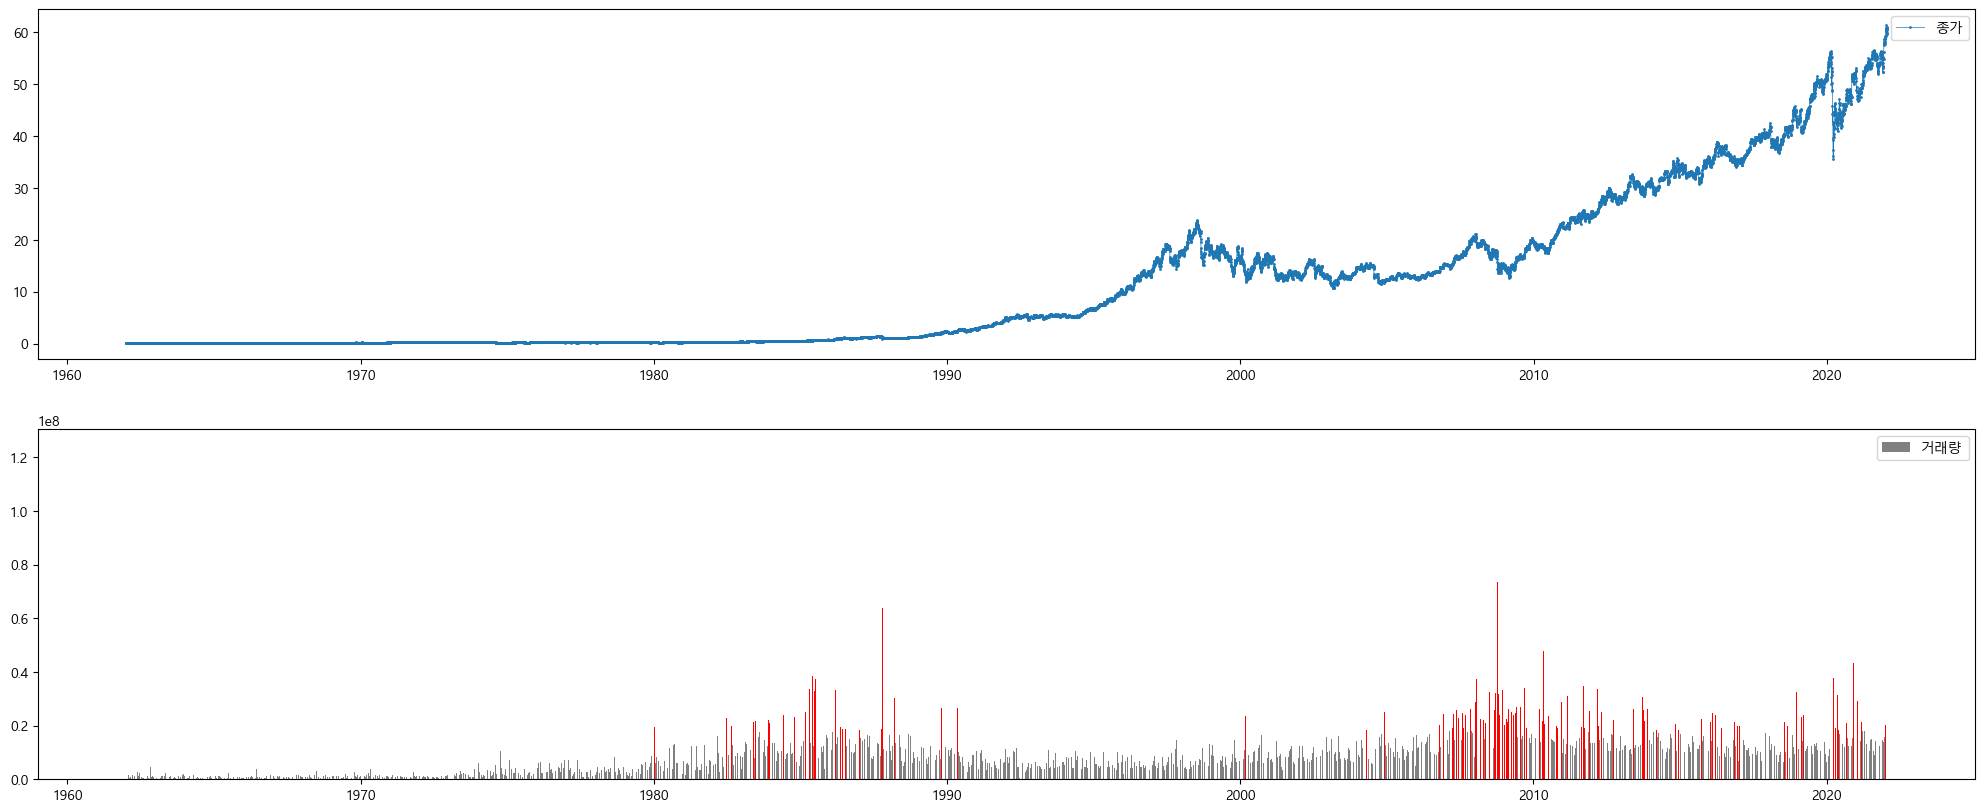

In [33]:
plt.figure(figsize=(25, 10))

plt.subplot(2,1,1);
plt.plot(df['Date'], df['Close'], 'o-', ms=1, lw=0.5, label='종가');
plt.legend();


plt.subplot(2,1,2);
plt.bar(df['Date'], df['Volume'], label='거래량', color=colors);
plt.legend();

주가 트렌드와 거래량 이슈 그래프를 동시에 표현해서 주가와 거래량과의 추이를 살펴본다

In [43]:
df['rate_color'] = np.where(df['rate_issue']==1, 'red', 'gray')
colors_rate=list(df['rate_color'])
print(colors_rate)

['gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', '

주가변동 이슈날을 그래프로 표현하기 위해 색상 데이터를 생성한다

In [36]:
df['rate_color'].value_counts()

gray    14986
red       136
Name: rate_color, dtype: int64

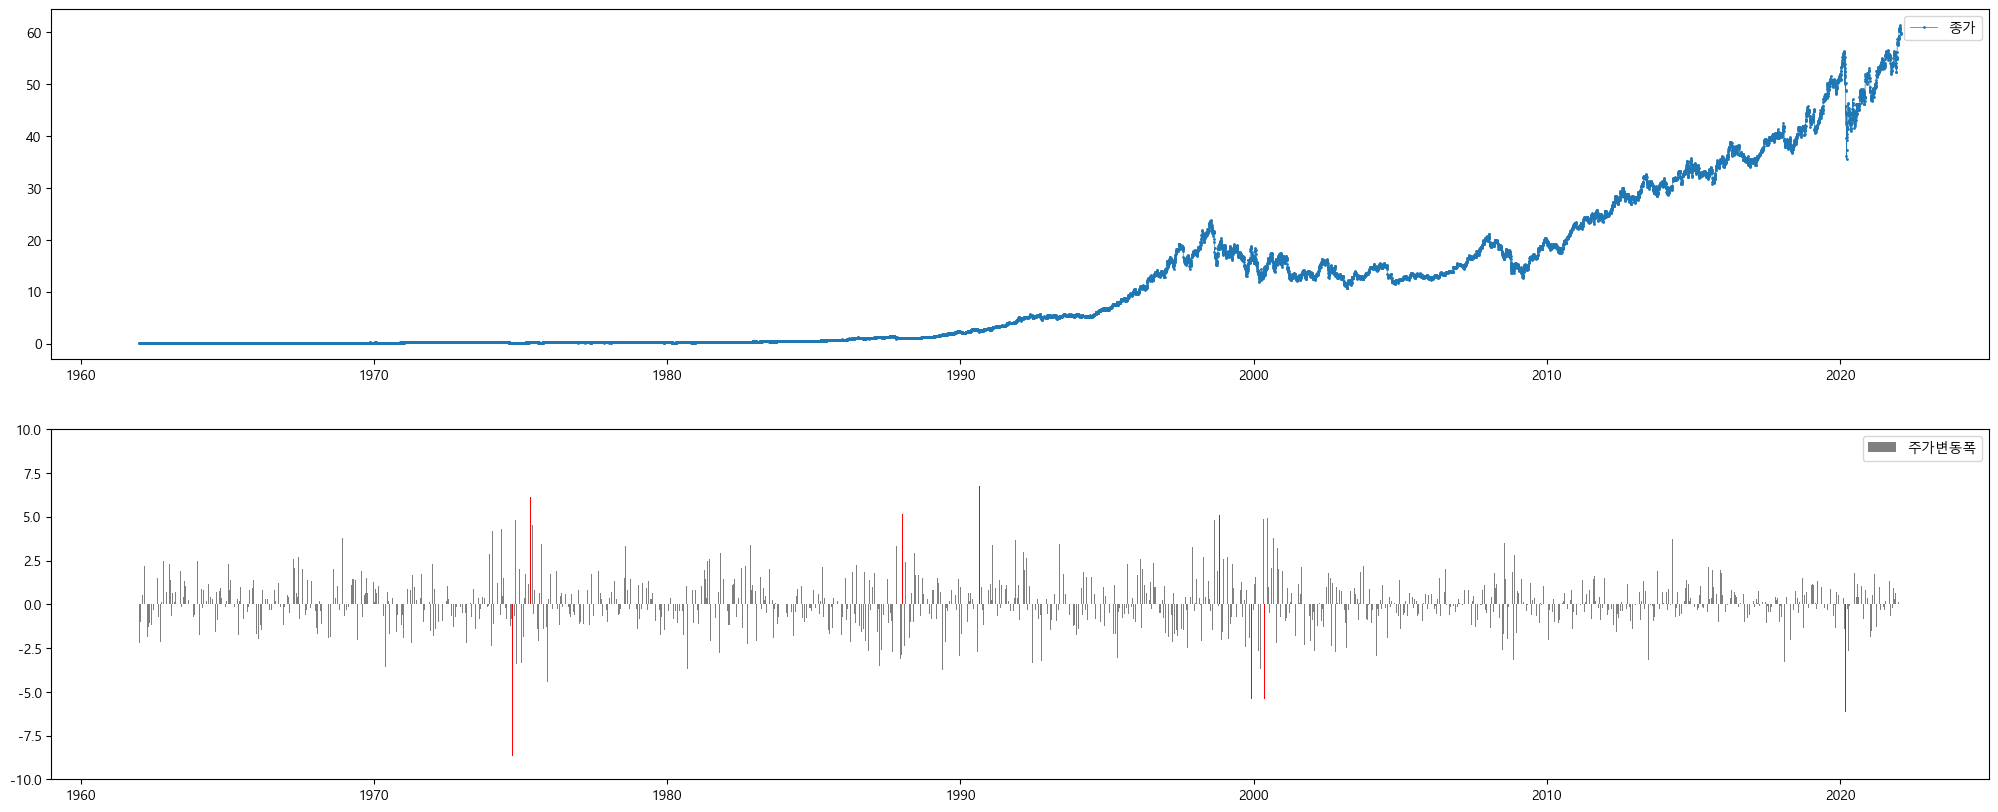

In [37]:
plt.figure(figsize=(25, 10))

plt.subplot(2,1,1)
plt.plot(df['Date'], df['Close'], 'o-', ms=1, lw=0.5, label='종가');
plt.legend();

plt.subplot(2,1,2);
plt.bar(df['Date'], df['rate'], label='주가변동폭',color=colors_rate);
plt.ylim(-10,10);
plt.legend();

주가 트렌드와 주가변동 이슈 그래프를 동시 표현해서 주가와 주가변동폭과의 추이를 살펴본다 

## ML 활용 주가 예측

In [44]:
df.drop(['vol_color', 'rate_color'],axis=1, inplace=True)
df.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume_issue,Close_lag,rate,rate_issue
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0,0,0.051133,0.000013,0
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0,0,0.051133,-2.227947,0
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0,0,0.049994,0.759800,0


모델링에 필요없는 컬럼은 제거한다. 새로 만든 컬럼인 색상은 주가 예측에 도움이 되지 않는다

In [45]:
df['rate_issue'] = np.where(df['rate'] > 3, 1, 0)
df['rate_issue'].value_counts()

0    14727
1      395
Name: rate_issue, dtype: int64

5% 이상은 Target률이 너무 적기 때문에 예측할 대상을 3% 기준으로 재설정한다

In [46]:
print("당일 기준 전날대비 3% 이상 변화할 확률 : ", (395 / (395+14727)) * 100)

당일 기준 전날대비 3% 이상 변화할 확률 :  2.612088348102103


In [47]:
df['target'] =  df['rate_issue'].shift(-1)
df = df.fillna(0)
df[['Date', 'Close', 'rate', 'target']].iloc[1180:1190]

,Date,Close,rate,target
1180,1966-09-07,0.082183,-2.356980,0.0
1181,1966-09-08,0.082750,0.689594,0.0
1182,1966-09-09,0.083292,0.654997,1.0
1183,1966-09-12,0.087856,5.479592,0.0
1184,1966-09-13,0.087285,-0.649300,0.0
1185,1966-09-14,0.087285,0.000000,0.0
1186,1966-09-15,0.087856,0.653543,0.0
1187,1966-09-16,0.086429,-1.623512,0.0
1188,1966-09-19,0.087142,0.825001,0.0
1189,1966-09-20,0.086715,-0.490884,0.0


다음날 3% 초과의 변동이 있는 날을 예측하는 문제이기 때문에 shift(-1)을 적용하여 target 변수를 새로 생성한다. shift(-1)로 설정한것은 rate issue가 당일 기준이 아닌 전날로 맞춰놔야 다음날 예측이 가능하기 때문이다

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['Date','target'], axis=1)
Y=df['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(10585, 11)
(10585,)
(4537, 11)
(4537,)


In [49]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state=2023)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10309
         1.0       1.00      1.00      1.00       276

    accuracy                           1.00     10585
   macro avg       1.00      1.00      1.00     10585
weighted avg       1.00      1.00      1.00     10585

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      4418
         1.0       0.12      0.01      0.02       119

    accuracy                           0.97      4537
   macro avg       0.55      0.50      0.50      4537
weighted avg       0.95      0.97      0.96      4537



1. recall  

- 실제로 주가 이슈가 발생한 날중에서 주가 이슈 발생 예측을 맞춘 확률

- 장점 : 실제로 주가 이슈가 발생한 날만 살펴볼 수 있다.

- 단점 : 실제로 주가 이슈가 발생한 날이 적어서 모수가 작아지기 때문에 예측 확률이 낮아질 수 있다.

2. support

- 119일 중에 8일을 맞춰서 0.01 결과값이 나왔다

- 주가 예측은 극단적으로 예측 확률이 낮을 수 밖에 없다. 다양한 환경에 변화하기 때문이다

In [50]:
pd.Series(y_pred_test).value_counts()

0.0    4529
1.0       8
dtype: int64

In [51]:
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:,1]
y_pred_test_proba = rfc.predict_proba(x_test)[:,1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 1.0
roc_score_test : 0.6266980762427198


4. roc_auc_score

- 이진 분류기의 성능을 평가할때 사용하는 지표로 100에 가까울 수록 모델 성능이 좋은 것이라고 할 수 있다.

- 다양한 threshold에 대한 이진분류기의 성능을 한번에 표시한 것이다.

- 여기서도 train과 test의 roc_score값이 크게 차이가 나는 것을 확인할 수 있으며, 과적합이 발생했다고 알 수 있다.

5. predict

- 0과 1로 나누는 것(0.5 이하는 0, 초과는 1)

6. predict_proba

- 0일 확률과 1일 확률로 나누는 것

- [:, 1]의 의미는 전체 거래일을 불러오기 위해 행을 :, 주가 이슈가 발생한 확률만 추출하기 위해 2번째에 있는 열인 1을 불러온다는 의미이다.

- 1번째에 있는 열은 주가 이슈가 발생하지 않은 날들의 확률이다.

In [52]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')
  
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot에서 임곗값에 따른 FPR, TPR 값을 반환 받는다  

- FPR : 실제로는 음성인 데이터 중에서 분류기가 음성이 아니라 양성이라고 판별한 데이터의 비율(1 - 민감도)

- TPR : recall

- roc curve를 plot 곡선으로 그린다

- 가운데 대각선 직선을 그린다(기준선)

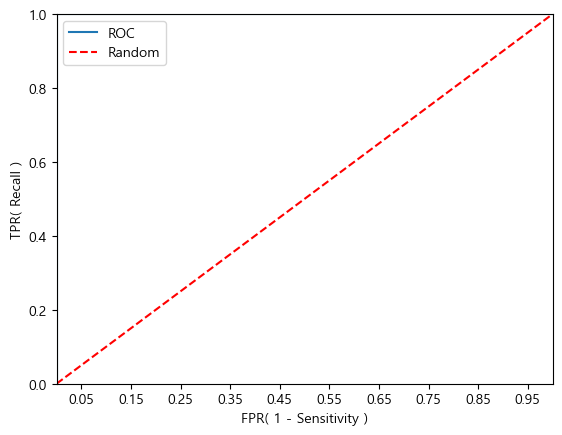

In [53]:
roc_curve_plot(y_train, y_pred_train_proba)

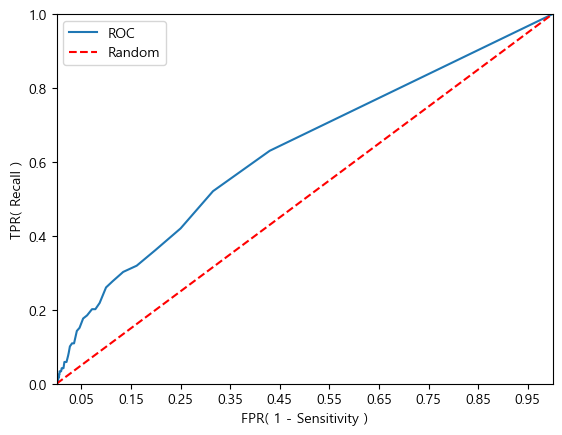

In [54]:
roc_curve_plot(y_test, y_pred_test_proba)

In [56]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [400, 500],
           'max_depth' : [6, 8, 10, 12]
            }

rf_clf = RandomForestClassifier(random_state = 2023, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1, scoring='recall')
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'n_estimators': 400}
최고 예측 정확도: 0.0181


위의 n_jobs가 -1이면 컴퓨터의 모든 코어를 사용한다는 의미이다

scoring을 recall으로 선택한 이유는 주가 예측은 실제 상승할것을 맞추는게 중요하기 때문이다

In [57]:
rfc = RandomForestClassifier(n_estimators=400, max_depth=10, random_state = 2023)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     10309
         1.0       1.00      0.11      0.20       276

    accuracy                           0.98     10585
   macro avg       0.99      0.55      0.59     10585
weighted avg       0.98      0.98      0.97     10585

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      4418
         1.0       0.25      0.01      0.02       119

    accuracy                           0.97      4537
   macro avg       0.61      0.50      0.50      4537
weighted avg       0.95      0.97      0.96      4537



최적의 하이퍼 파라미터를 통해 다시 랜덤포레스트를 학습시킨 결과, train의 precision이 1.00이고 test의 precision이 0.25로 아직도 과적합이 해결되지 않았지만, 이전보다 어느정도 나아진 모델임을 알 수 있다

In [58]:
pd.Series(y_pred_test).value_counts()

0.0    4533
1.0       4
dtype: int64

In [59]:
y_pred_train = rfc.predict_proba(x_train)
y_pred_train = y_pred_train[:, 1]

for i in range(0,len(y_pred_train)):
    if y_pred_train[i]>=0.028:       
        y_pred_train[i]=1
    else:  
        y_pred_train[i]=0

y_pred_test = rfc.predict_proba(x_test)
y_pred_test = y_pred_test[:, 1]

for i in range(0,len(y_pred_test)):
    if y_pred_test[i]>=0.028:       
        y_pred_test[i]=1
    else:  
        y_pred_test[i]=0


print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.75      0.85     10309
         1.0       0.09      0.97      0.17       276

    accuracy                           0.75     10585
   macro avg       0.55      0.86      0.51     10585
weighted avg       0.98      0.75      0.84     10585

              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82      4418
         1.0       0.05      0.54      0.09       119

    accuracy                           0.70      4537
   macro avg       0.51      0.62      0.45      4537
weighted avg       0.96      0.70      0.80      4537



과적합을 해결하기 위해 threshold 조정을 통해 train의 precision이 0.09이고 test의 precision이 0.05로 이전보다 훨씬 좋아진 것을 확인할 수 있다.

In [60]:
pd.Series(y_pred_test).value_counts()

0.0    3172
1.0    1365
dtype: int64

In [61]:
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:,1]
y_pred_test_proba = rfc.predict_proba(x_test)[:,1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.9562356516959292
roc_score_test : 0.679505346729004


여기서도 최적의 하이퍼 파라미터를 통해 train과 test의 roc_score값을 보아 과적합이 이전보다 해결되었다고 할 수 있다

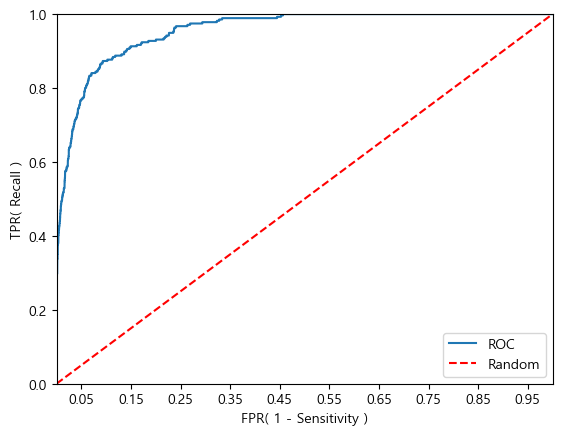

In [62]:
roc_curve_plot(y_train, y_pred_train_proba)

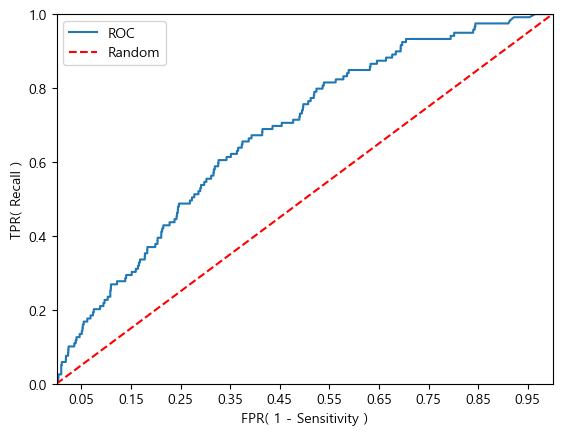

In [63]:
roc_curve_plot(y_test, y_pred_test_proba)

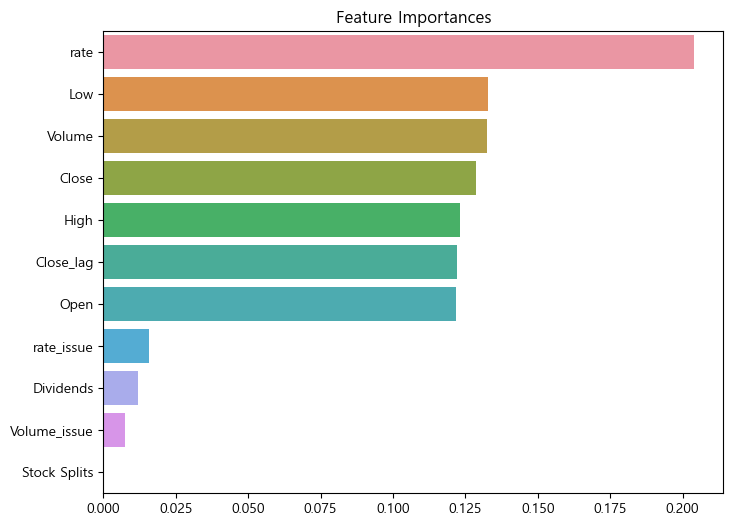

In [64]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:21]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

Feature IMP 분석을 통해 중요변수를 파악한다. 위의 상위 변수들을 살펴보면, rate(전날 대비 상승률/하락률)가 주가 예측하는데 가장 중요한 변수들임을 확인할 수 있다. 따라서 전날 대비 상승률/하락률을 주의 깊게 살펴가면서 예측을 진행하는 것이 좋은 판단이다

주가 예측은 모든 데이터를 활용해야하기에 중요하지 않은 하위 변수들을 제거하고 다시 모델링하는 것은 좋지않다

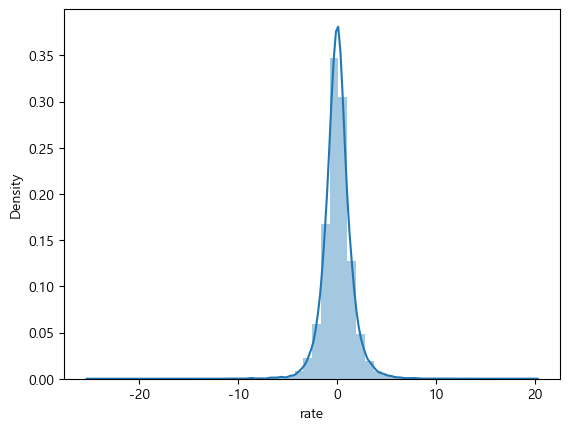

In [65]:
sns.distplot(df['rate']);

가장 중요한 변수에 대해 상세한 탐색을 실시한다. rate(전날 대비 상승률/하락률)의 분포를 확인한다

In [66]:
import numpy as np
df['rate_gp'] = np.where (df['rate'] <= -5, 1, 
                           np.where(df['rate'] <= 5, 2, 3))

df[['rate','rate_gp']]

,rate,rate_gp
0,0.000013,2
1,-2.227947,2
2,0.759800,2
3,-2.261532,2
4,-1.028203,2
...,...,...
15117,-0.409836,2
15118,-0.493826,2
15119,-0.810590,2
15120,-0.233488,2


-5, 5 사이의 값을 평균으로 측정하고 3개의 구간으로 구간화를 진행한다

In [67]:
df.groupby(['rate_gp', 'target'])['rate'].count()

rate_gp  target
1        0.0          44
         1.0          14
2        0.0       14616
         1.0         370
3        0.0          67
         1.0          11
Name: rate, dtype: int64

In [69]:
print("gp1 :", (14 / (14+44))*100)
print("gp2 :", (370 / (370+14616))*100)
print("gp3 :", (11 / (11+67))*100)

gp1 : 24.137931034482758
gp2 : 2.4689710396369944
gp3 : 14.102564102564102


전날 기준으로 종가가 하락했을 경우, 상승될 확률이 24%정도 더 높은 것을 확인할 수 있다. 가장 중요한 변수임을 알 수 있고, 매우 주의깊게 살펴봐야한다

성과측정은 기본 베이스 코드(위의 전체 코드)를 가지고 익월 데이터를 추가 업로드해서 성과비교가 필요하다. 예를 들어, 위의 데이터로 예측한 주가를 추후 주가 예측에 대한 적중률과 비교하는 것이 필요하다

ex) 주가 상승 예측 날짜 = gp1의 날짜들(rate가 -5이하인 날들)